# Applying statistical modeling and machine learning to perform time-series forecasting.

Tamara Louie  
PyData LA  
October 2018

# Time-series data due diligence

## Read in my data
**Please download from http://insideairbnb.com/get-the-data.html the following CSV file (23 MB) under the "Los Angeles" section:**

	reviews.csv
  

You should have **reviews.csv** stored somewhere locally. 

Run the cell below, and click on the button **Choose Files**, to select your **reviews.csv** to upload.  

*Note: It will take some time to upload this data, so please start your upload and this upload will run for a couple of minutes.*

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving reviews.csv to reviews.csv
User uploaded file "reviews.csv" with length 22578685 bytes


## Import some relevant packages
Ideally, one should set up their own virtual environment and determine the versions of each library that they are using.  Here, we will assume that the colaboratory environment has some shared environment with access to common Python libraries and the ability to install other libraries necessary.

In [25]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML, display_html
import seaborn as sns
import datetime


# set formatting
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# read in CSV file data
df = pd.read_csv('output/2ModerateLockdown/Netherlands1.csv')

## Look at my data
- How many rows are in the dataset?
- How many columns are in this dataset?
- What data types are the columns?
- Is the data complete? Are there nulls? Do we have to infer values?
- What is the definition of these columns?
- What are some other caveats to the data?


In [26]:
# look at data
display(df.head())

# look a shape of data
display(df.shape)

# look at data types. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].dtypes)

# see if any columns have nulls. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].isnull().any())

# display descriptive statistics
display(df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,driving,transit,walking,days,Lockdown
0,128,46,1,1,7.470,2.685,0.058,0.058,105.36,119.53,167.19,1,0
1,188,60,1,0,10.972,3.502,0.058,0.000,91.72,101.40,103.37,2,0
2,265,77,3,2,15.466,4.494,0.175,0.117,97.44,98.01,97.60,3,0
3,321,56,3,0,18.734,3.268,0.175,0.000,94.05,94.36,92.04,4,0
4,382,61,4,1,22.294,3.560,0.233,0.058,92.55,90.51,99.58,5,0


(59, 13)

total_cases                  int64
new_cases                    int64
total_deaths                 int64
new_deaths                   int64
total_cases_per_million    float64
dtype: object

total_cases                False
new_cases                  False
total_deaths               False
new_deaths                 False
total_cases_per_million    False
dtype: bool

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,driving,transit,walking,days,Lockdown
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,18048.728814,686.254237,1954.169492,85.694915,1053.333119,40.050119,114.046339,5.001136,58.540000,32.423729,60.929322,30.000000,1.745763
std,14436.314646,387.257670,1795.377716,60.683820,842.510780,22.600514,104.779201,3.541490,14.343475,23.846450,21.448760,17.175564,0.604387
min,128.000000,46.000000,1.000000,0.000000,7.470000,2.685000,0.058000,0.000000,38.990000,17.620000,33.840000,1.000000,0.000000
25%,3312.500000,366.000000,121.000000,30.000000,193.319000,21.360000,7.061500,1.751000,48.875000,20.965000,47.145000,15.500000,2.000000
50%,16627.000000,734.000000,1651.000000,93.000000,970.360000,42.837000,96.353000,5.428000,54.330000,23.600000,57.650000,30.000000,2.000000
75%,32122.000000,1019.000000,3642.500000,133.000000,1874.656500,59.469000,212.578000,7.762000,62.995000,26.940000,63.910000,44.500000,2.000000
85%,36731.500000,1114.800000,4325.000000,147.300000,2143.669100,65.060300,252.409200,8.596400,67.346000,35.665000,69.043000,50.300000,2.000000
95%,39363.500000,1225.100000,4804.800000,175.600000,2297.274100,71.497200,280.410900,10.248000,92.700000,94.725000,99.596000,56.100000,2.000000
99%,40376.700000,1323.980000,5015.980000,207.900000,2356.405000,77.267780,292.735340,12.132920,100.766400,109.014600,130.174400,58.420000,2.000000


## What are some questions I can answer with this data?

Understand the limitations of your data and what potential questions can be answered by data is important.  These questions can reduce, expand, or modify the scope of your project.

If you defined a scope or goal for your project before digging into the data, this might be a good time to revisit it.

**Data.** We have daily count of reviews for given listing ids for given dates.

**Questions I could try to answer. **

*   Forecast future number of reviews for the Los Angeles area.
* Forecast the future number of reviews for specific listings in the Los Angeles area.

## What techniques may help answer these questions?
### Statistical models
*   **Ignore the time-series aspect completely and model using traditional statistical modeling toolbox.** 
  *   *Examples.* Regression-based models.  
*   **Univariate statistical time-series modeling.**
  *   *Examples.* Averaging and smoothing models, ARIMA models.
*   **Slight modifications to univariate statistical time-series modeling.**
  *    *Examples.* External regressors, multi-variate models.
*   **Additive or component models.**
  *  *Examples.* Facebook Prophet package.
*   **Structural time series modeling.**
  *    *Examples.* Bayesian structural time series modeling, hierarchical time series modeling.

### Machine learning models

*   **Ignore the time-series aspect completely and model using traditional machine learning modeling toolbox.** 
  *   *Examples.* Support Vector Machines (SVMs), Random Forest Regression, Gradient-Boosted Decision Trees (GBDTs).
*   **Hidden markov models (HMMs).**
*   **Other sequence-based models.**
*   **Gaussian processes (GPs).**
*   **Recurrent neural networks (RNNs).**
  
### Additional data considerations before choosing a model
*   Whether or not to incorporate external data
*   Whether or not to keep as univariate or multivariate (i.e., which features and number of features)
*   Outlier detection and removal
*   Missing value imputation

# Let's analyze some time-series data!

- [Link 1](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)
- [Link 2](https://content.nexosis.com/blog/methods-of-demand-forecasting-bsts-prophet)

## Process my data

In [3]:
# # Rename columns
# df = df.rename(columns = {'date': 'ds', 'listing_id': 'ts'})

# # Group data by number of listings per date
# df_example = df.groupby(by = 'ds').agg({'ts': 'count'})

# # Change index to datetime
# df_example.index = pd.to_datetime(df_example.index)

# # Set frequency of time series
# df_example = df_example.asfreq(freq='1D')

# # Sort the values
# df_example = df_example.sort_index(ascending = True)

# # Fill values with 0
# df_example = df_example.fillna(value = 0)
df=df.drop(['Unnamed: 0','Unnamed: 29'],axis=1)
# #2.Remove string features
df=df.drop(['iso_code','location'],axis=1)
# df=df.drop(['date'],axis=1)
# #3.Remove mostly empty featrues
df=df.drop(['total_tests','new_tests','total_tests_per_thousand','tests_units','new_tests_per_thousand'],axis=1)
df=df.drop(['handwashing_facilities'],axis=1)
#4.Remove irrelevant features (Economy)
df=df.drop(['population','population_density','aged_65_older','aged_70_older','cvd_death_rate','diabetes_prevalence','female_smokers','male_smokers','hospital_beds_per_100k'],axis=1)
df=df.drop(['median_age'],axis=1)
df=df.drop(['extreme_poverty','gdp_per_capita',],axis=1)
# df
# Show the end of the data
display(df.tail())

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,driving,transit,walking,days
59,2020-05-05,40770,199,5082,26,2379.358,11.614,296.588,1.517,66.65,29.16,70.34,60
60,2020-05-06,41087,317,5168,86,2397.858,18.500,301.607,5.019,70.98,30.91,70.17,61
61,2020-05-07,41319,232,5204,36,2411.398,13.540,303.708,2.101,73.52,31.04,72.87,62
62,2020-05-08,41774,455,5288,84,2437.952,26.554,308.610,4.902,78.17,31.21,81.33,63
63,2020-05-09,42093,319,5359,71,2456.569,18.617,312.754,4.144,72.17,30.07,82.85,64


In [27]:
#remove fixed data 
#df=df.drop(['population','population_density','aged_65_older','aged_70_older','cvd_death_rate','diabetes_prevalence','female_smokers','male_smokers','hospital_beds_per_100k'],axis=1)
df=df.drop(['total_cases','total_deaths','new_deaths','total_cases_per_million','total_deaths_per_million','new_deaths_per_million'],axis=1)
display(df.tail())

,new_cases,new_cases_per_million,driving,transit,walking,days,Lockdown
54,386,22.527,67.31,27.51,59.81,55,2
55,514,29.997,69.38,27.21,61.28,56,2
56,475,27.721,62.34,24.39,61.65,57,1
57,445,25.970,60.40,26.69,64.81,58,1
58,335,19.551,63.65,28.04,64.46,59,1


In [44]:
# df=df.drop(['new_cases_per_million'],axis=1)
# df=df.drop(['Lockdown','days'],axis=1)
df

,new_cases,driving,transit,walking
0,46,105.36,119.53,167.19
1,60,91.72,101.40,103.37
2,77,97.44,98.01,97.60
3,56,94.05,94.36,92.04
4,61,92.55,90.51,99.58
5,121,79.19,77.33,90.87
6,111,72.71,69.44,92.53
7,190,64.97,61.84,99.74
8,155,48.64,43.19,58.43
9,176,51.11,32.44,49.53


## Plot my data
- There does appear to be an overall increasing trend. 
- There appears to be some differences in the variance over time. 
- There may be some seasonality (i.e., cycles) in the data.
- Not sure about outliers.

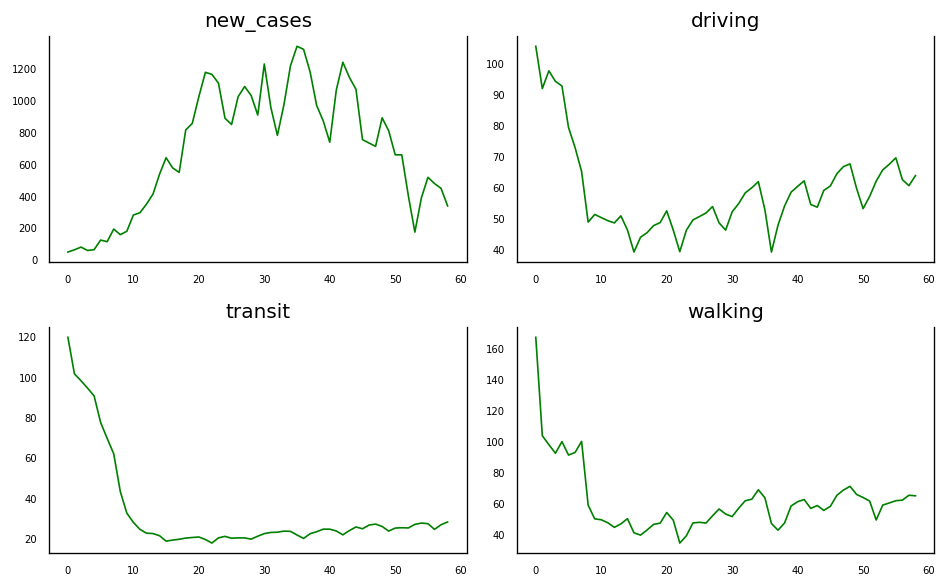

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(8,5))
try:
    for i, ax in enumerate(axes.flatten()):
        data = df[df.columns[i]]
        ax.plot(data, color='green', linewidth=1)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
        ax.tick_params(labelsize=6)
except:
    pass

plt.tight_layout();

In [49]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
#df.columns[1:-1]
grangers_causation_matrix(df, variables = df.columns) 

,new_cases_x,driving_x,transit_x,walking_x
new_cases_y,1.0,0.0,0.158,0.0656
driving_y,0.0,1.0,0.000,0.0000
transit_y,0.0,0.0,1.000,0.0000
walking_y,0.0,0.0,0.000,1.0000


## Most of values expect (1,3) are smaller than 0.05, therefore it is appropariate to VAR test

In [32]:
##### from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)
#df.iloc[:,[1,2,3,4]] 
cointegration_test(df)


NameError: name 'coint_johansen' is not defined

In [34]:
nobs = 9
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(50, 4)
(9, 4)


## Look at stationarity
Most time-series models assume that the underlying time-series data is **stationary**.  This assumption gives us some nice statistical properties that allows us to use various models for forecasting.

**Stationarity** is a statistical assumption that a time-series has:
*   **Constant mean**
*   **Constant variance**
*   **Autocovariance does not depend on time**

More simply put, if we are using past data to predict future data, we should assume that the data will follow the same general trends and patterns as in the past.  This general statement holds for most training data and modeling tasks.

**There are some good diagrams and explanations on stationarity [here](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/) and [here](https://people.duke.edu/~rnau/411diff.htm).**

Sometimes we need to transform the data in order to make it stationary.  However, this  transformation then calls into question if this data is truly stationary and is suited to be modeled using these techniques.

**Looking at our data:**
- Rolling mean and standard deviation look like they change over time.  There may be some de-trending and removing seasonality involved. Based on **Dickey-Fuller test**, because p = 0.31, we fail to reject the null hypothesis (that the time series is not stationary) at the p = 0.05 level, thus concluding that we fail to reject the null hypothesis that our **time series is not stationary**.

In [35]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df, ts):
    
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """
    
    # Determing rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

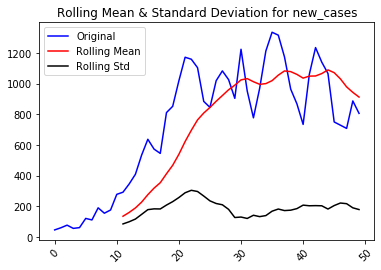

Results of Dickey-Fuller Test:
Test Statistic                 -1.849619
p-value                         0.356120
# Lags Used                     0.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


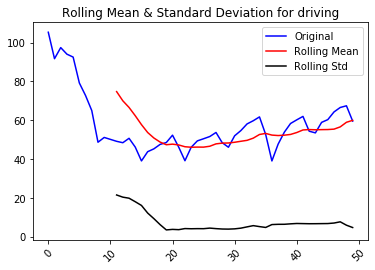

Results of Dickey-Fuller Test:
Test Statistic                 -3.370913
p-value                         0.011991
# Lags Used                     7.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


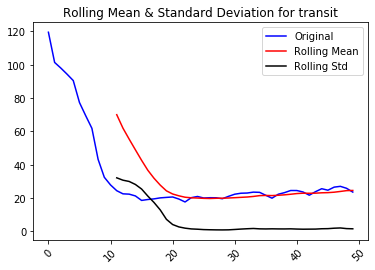

Results of Dickey-Fuller Test:
Test Statistic                -8.144651e+00
p-value                        1.006472e-12
# Lags Used                    7.000000e+00
Number of Observations Used    4.200000e+01
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
Critical Value (10%)          -2.604991e+00
dtype: float64


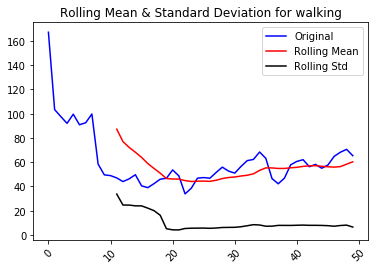

Results of Dickey-Fuller Test:
Test Statistic                 -3.499224
p-value                         0.008007
# Lags Used                     7.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [36]:
test_stationarity(df = df_train, ts = 'new_cases')
test_stationarity(df = df_train, ts = 'driving')
test_stationarity(df = df_train, ts = 'transit')
test_stationarity(df = df_train, ts = 'walking')

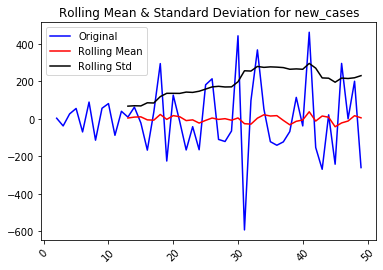

Results of Dickey-Fuller Test:
Test Statistic                 -2.637919
p-value                         0.085411
# Lags Used                     8.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


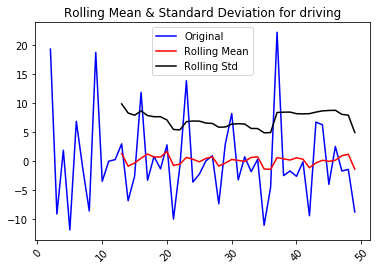

Results of Dickey-Fuller Test:
Test Statistic                 -4.123391
p-value                         0.000886
# Lags Used                     6.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


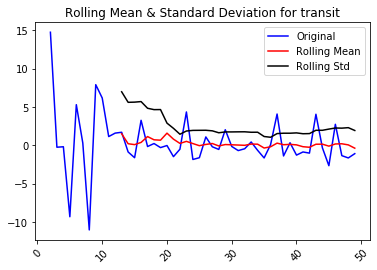

Results of Dickey-Fuller Test:
Test Statistic                 -3.197173
p-value                         0.020149
# Lags Used                     6.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


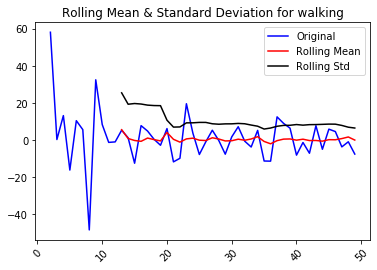

Results of Dickey-Fuller Test:
Test Statistic                -1.142779e+01
p-value                        6.629638e-21
# Lags Used                    5.000000e+00
Number of Observations Used    4.200000e+01
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
Critical Value (10%)          -2.604991e+00
dtype: float64


In [37]:
df_differenced = df_train.diff().dropna()
df_differenced = df_differenced.diff().dropna()
test_stationarity(df = df_differenced, ts = 'new_cases')
test_stationarity(df = df_differenced, ts = 'driving')
test_stationarity(df = df_differenced, ts = 'transit')
test_stationarity(df = df_differenced, ts = 'walking')

In [38]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
model = VAR(df_differenced)
model_fitted = model.fit(4)
model_fitted.summary()

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 30, May, 2020
Time:                     22:50:54
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    21.1152
Nobs:                     44.0000    HQIC:                   19.3804
Log likelihood:          -585.605    FPE:                1.11225e+08
AIC:                      18.3578    Det(Omega_mle):     3.01088e+07
--------------------------------------------------------------------
Results for equation new_cases
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const              -10.590507        25.298792           -0.419           0.675
L1.new_cases        -0.748527         0.178525           -4.193           0.000
L1.driving          -0.173667         9.345902           -0.

In [39]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)
def adjust(val, length= 6): return str(val).ljust(length)
for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

new_cases : 2.28
driving : 1.94
transit : 1.54
walking : 2.1


In [40]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

4


array([[ 295.  ,    2.55,    2.73,    4.5 ],
       [   0.  ,   -1.68,   -1.36,   -3.75],
       [ 200.  ,   -1.42,   -1.66,   -1.01],
       [-260.  ,   -8.75,   -1.1 ,   -7.63]])

In [41]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,new_cases_2d,driving_2d,transit_2d,walking_2d
50,7.480746,8.381604,3.029000,2.972724
51,-11.919144,2.768141,-0.729984,-1.025134
52,-54.609164,0.024254,-0.497306,5.821558
53,72.401212,-1.273853,1.483990,2.100497
54,99.619690,-0.273889,0.170406,-2.767675
55,-14.600425,-1.244889,-1.294991,-3.986097
56,-107.558575,-0.301800,0.951757,1.922145
57,-19.564451,2.240878,1.656131,2.009549
58,21.580855,2.022145,-0.366440,-0.707845


In [42]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [43]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['new_cases_forecast', 'driving_forecast', 'transit_forecast', 'walking_forecast']]

,new_cases_forecast,driving_forecast,transit_forecast,walking_forecast
50,732.480746,60.051604,24.299000,63.082724
51,647.042348,63.321349,24.318015,59.790314
52,506.994785,66.615349,23.839725,62.319462
53,439.348435,68.635495,24.845424,66.949107
54,471.321775,70.381752,26.021529,68.811077
55,488.694690,70.883121,25.902644,66.686950
56,398.509030,71.082689,26.735516,66.484968
57,288.758918,73.523136,29.224518,68.292535
58,200.589662,77.985728,31.347081,69.392256


AttributeError: 'AxesSubplot' object has no attribute 'flatten'

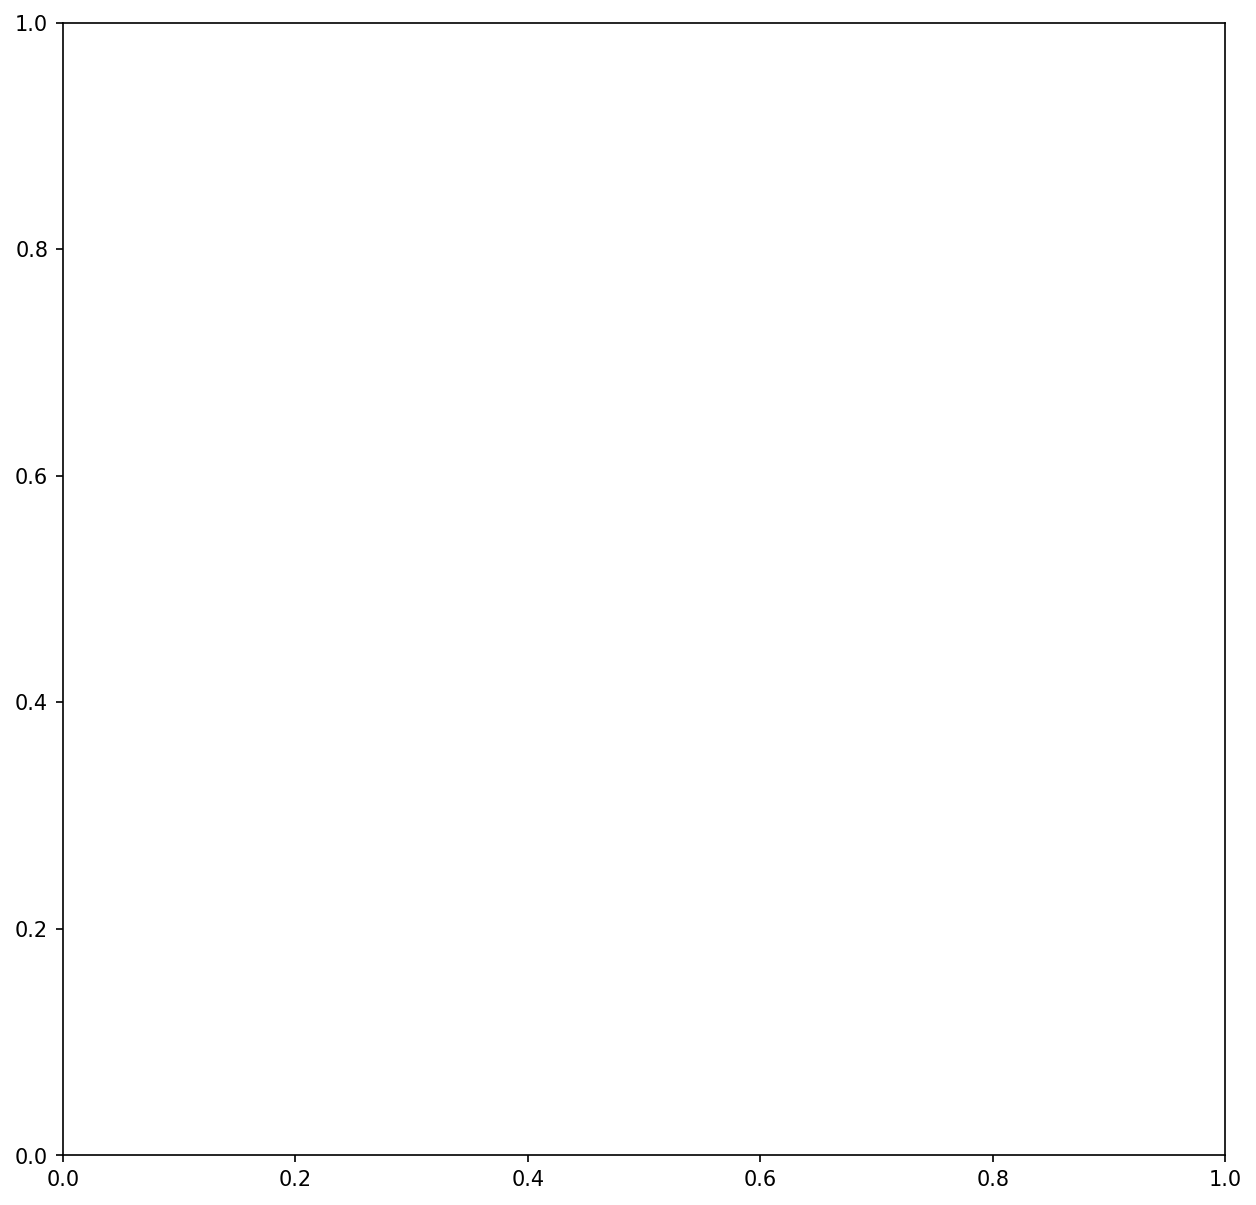

In [24]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    break
plt.tight_layout();

In [97]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    #me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    #corr = np.corrcoef(forecast, actual)[0,1]   # corr
    #mins = np.amin(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     #maxs = np.amax(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
    #minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

#     return({'mape':mape, 'me':me, 'mae': mae, 
#             'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: new_cases')
accuracy_prod = forecast_accuracy(df_results['new_cases_forecast'].values, df_test['new_cases'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: driving')
accuracy_prod = forecast_accuracy(df_results['driving_forecast'].values, df_test['driving'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: transit')
accuracy_prod = forecast_accuracy(df_results['transit_forecast'].values, df_test['transit'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: walking')
accuracy_prod = forecast_accuracy(df_results['walking_forecast'].values, df_test['walking'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))



Forecast Accuracy of: new_cases
mape   :  0.416
mae    :  123.0925
mpe    :  0.3886
rmse   :  132.7182

Forecast Accuracy of: driving
mape   :  0.0867
mae    :  6.1072
mpe    :  -0.0867
rmse   :  6.9067

Forecast Accuracy of: transit
mape   :  0.0469
mae    :  1.3426
mpe    :  0.0077
rmse   :  1.5374

Forecast Accuracy of: walking
mape   :  0.324
mae    :  23.7536
mpe    :  -0.324
rmse   :  25.9851


In [134]:
# VARMAX example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
data_exog = [x + random() for x in range(100)]
# fit model
model = VARMAX(data, exog=data_exog, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
data_exog2 = [[100]]
yhat = model_fit.forecast(exog=data_exog2)
print(yhat)

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


[[0.48712508 0.90827373]]


/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


## Correct for stationarity

It is common for time series data to have to correct for non-stationarity. 

2 common reasons behind non-stationarity are:

1. **Trend** – mean is not constant over time.
2. **Seasonality** – variance is not constant over time.

There are ways to correct for trend and seasonality, to make the time series stationary.

**What happens if you do not correct for these things?**

Many things can happen, including:
- Variance can be mis-specified
- Model fit can be worse.  
- Not leveraging valuable time-dependent nature of the data.  

Here are some resources on the pitfalls of using traditional methods for time series analysis.  
[Quora link](https://www.quora.com/Why-cant-you-use-linear-regression-for-time-series-data)  
[Quora link](https://www.quora.com/Data-Science-Can-machine-learning-be-used-for-time-series-analysis)  


## Eliminating trend and seasonality
*   **Transformation**
  *   *Examples.* Log, square root, etc.
  *   We are going to look at log.
*   **Smoothing**
  *  *Examples.* Weekly average, monthly average, rolling averages.
  *   We are going to look at weekly average.
*   **Differencing**
  *  *Examples.* First-order differencing.
  *   We are going to look at first-order differencing.
*   **Polynomial Fitting**
  *  *Examples.* Fit a regression model.
*   **Decomposition**

## Transformation, Smoothing, and Differencing
**Looking at our data:**
- Applying log transformation, weekly moving average smoothing, and differencing made the data more stationary over time. Based on **Dickey-Fuller test**, because p = < 0.05, we fail to reject the null hypothesis (that the time series is not stationary) at the p = 0.05 level, thus concluding that the **time series is stationary**.

In [15]:
def plot_transformed_data(df, ts, ts_transform):
    """
    Plot transformed and original time series data
    """
    # Plot time series data
    f, ax = plt.subplots(1,1)
    ax.plot(df[ts])
    ax.plot(df[ts_transform], color = 'red')

    # Add title
    ax.set_title('%s and %s time-series graph' %(ts, ts_transform))

    # Rotate x-labels
    ax.tick_params(axis = 'x', rotation = 45)

    # Add legend
    ax.legend([ts, ts_transform])

    plt.show()
    plt.close()

    return

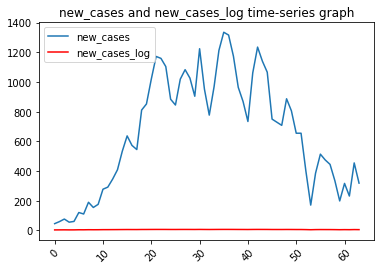

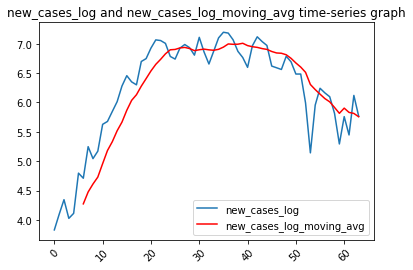

In [74]:
# Transformation - log ts
df['new_cases_log'] = df['new_cases'].apply(lambda x: np.log(x))

# Transformation - 7-day moving averages of log ts
df['new_cases_log_moving_avg'] = df['new_cases_log'].rolling(window = 7,
                                                               center = False).mean()

# # Transformation - 7-day moving average ts
# df_example['new_cases_moving_avg'] = df['new_cases'].rolling(window = 7,
#                                                        center = False).mean()

# # Transformation - Difference between logged ts and first-order difference logged ts
# # df_example['ts_log_diff'] = df_example['ts_log'] - df_example['ts_log'].shift()
# df_example['ts_log_diff'] = df_example['ts_log'].diff()

# # Transformation - Difference between ts and moving average ts
# df_example['ts_moving_avg_diff'] = df_example['ts'] - df_example['ts_moving_avg']

# # Transformation - Difference between logged ts and logged moving average ts
# df_example['ts_log_moving_avg_diff'] = df_example['ts_log'] - df_example['ts_log_moving_avg']

# # Transformation - Difference between logged ts and logged moving average ts
# df_example_transform = df_example.dropna()

# # Transformation - Logged exponentially weighted moving averages (EWMA) ts
# df_example_transform['ts_log_ewma'] = df_example_transform['ts_log'].ewm(halflife = 7,
#                                                                          ignore_na = False,
#                                                                          min_periods = 0,
#                                                                          adjust = True).mean()

# # Transformation - Difference between logged ts and logged EWMA ts
# df_example_transform['ts_log_ewma_diff'] = df_example_transform['ts_log'] - df_example_transform['ts_log_ewma']

# Display data
#display(df_transform.head())

# Plot data
plot_transformed_data(df = df, 
                      ts = 'new_cases', 
                      ts_transform = 'new_cases_log')
# Plot data
plot_transformed_data(df = df, 
                      ts = 'new_cases_log', 
                      ts_transform = 'new_cases_log_moving_avg')

# # Plot data
# plot_transformed_data(df = df_example_transform, 
#                       ts = 'ts', 
#                       ts_transform = 'ts_moving_avg')

# # Plot data
# plot_transformed_data(df = df_example_transform, 
#                       ts = 'ts_log', 
#                       ts_transform = 'ts_log_diff')

# # Plot data
# plot_transformed_data(df = df_example_transform, 
#                       ts = 'ts', 
#                       ts_transform = 'ts_moving_avg_diff')

# # Plot data
# plot_transformed_data(df = df_example_transform, 
#                       ts = 'ts_log', 
#                       ts_transform = 'ts_log_moving_avg_diff')

# # Plot data
# plot_transformed_data(df = df_example_transform, 
#                       ts = 'ts_log', 
#                       ts_transform = 'ts_log_ewma')

# # Plot data
# plot_transformed_data(df = df_example_transform, 
#                       ts = 'ts_log', 
#                       ts_transform = 'ts_log_ewma_diff')

# # Perform stationarity test
# test_stationarity(df = df_example_transform, 
#                   ts = 'ts_log')

# # Perform stationarity test
# test_stationarity(df = df_example_transform, 
#                   ts = 'ts_moving_avg')

# # Perform stationarity test
# test_stationarity(df = df_example_transform, 
#                   ts = 'ts_log_moving_avg')

# # Perform stationarity test
# test_stationarity(df = df_example_transform,
#                   ts = 'ts_log_diff')

# # Perform stationarity test
# test_stationarity(df = df_example_transform,
#                   ts = 'ts_moving_avg_diff')

# # Perform stationarity test
# test_stationarity(df = df_example_transform,
#                   ts = 'ts_log_moving_avg_diff')

# # Perform stationarity test
# test_stationarity(df = df_example_transform, 
#                   ts = 'ts_log_ewma')

# # Perform stationarity test
# test_stationarity(df = df_example_transform,
#                   ts = 'ts_log_ewma_diff')

## Decomposition: trend, seasonality, residuals
**Looking at our data:**
- De-trending and de-seasonalizing made the data (i.e., the residuals) more stationary over time. Based on **Dickey-Fuller test**, because p = < 0.05, we fail to reject the null hypothesis (that the time series is not stationary) at the p = 0.05 level, thus concluding that the **time series is stationary**.

In [75]:
def plot_decomposition(df, ts, trend, seasonal, residual):
    """
    Plot time series data
    """
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

    ax1.plot(df[ts], label = 'Original')
    ax1.legend(loc = 'best')
    ax1.tick_params(axis = 'x', rotation = 45)

    ax2.plot(df[trend], label = 'Trend')
    ax2.legend(loc = 'best')
    ax2.tick_params(axis = 'x', rotation = 45)

    ax3.plot(df[seasonal],label = 'Seasonality')
    ax3.legend(loc = 'best')
    ax3.tick_params(axis = 'x', rotation = 45)

    ax4.plot(df[residual], label = 'Residuals')
    ax4.legend(loc = 'best')
    ax4.tick_params(axis = 'x', rotation = 45)
    plt.tight_layout()

    # Show graph
    plt.suptitle('Trend, Seasonal, and Residual Decomposition of %s' %(ts), 
               x = 0.5, 
               y = 1.05, 
               fontsize = 18)
    plt.show()
    plt.close()

    return

/usr/local/lib/python2.7/dist-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python2.7/dist-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(v

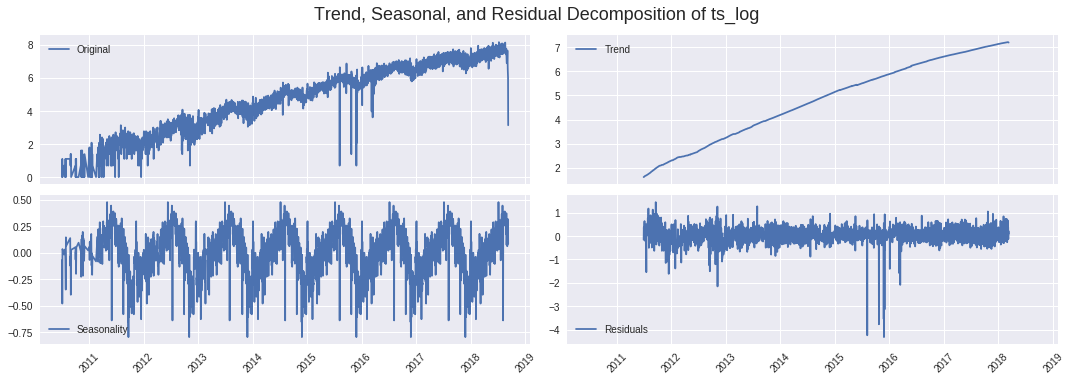

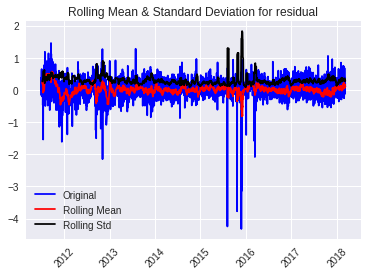

Results of Dickey-Fuller Test:
Test Statistic                -6.243743e+00
p-value                        4.629649e-08
# Lags Used                    2.700000e+01
Number of Observations Used    2.351000e+03
Critical Value (5%)           -2.862770e+00
Critical Value (1%)           -3.433135e+00
Critical Value (10%)          -2.567425e+00
dtype: float64


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_example_transform['ts_log'], freq = 365)

df_example_transform.loc[:,'trend'] = decomposition.trend
df_example_transform.loc[:,'seasonal'] = decomposition.seasonal
df_example_transform.loc[:,'residual'] = decomposition.resid

plot_decomposition(df = df_example_transform, 
                   ts = 'ts_log', 
                   trend = 'trend',
                   seasonal = 'seasonal', 
                   residual = 'residual')

test_stationarity(df = df_example_transform.dropna(), ts = 'residual')

# Let us model some time-series data! Finally! ARIMA models.

We will be doing an example here! We can use ARIMA models when we know there is dependence between values and we can leverage that information to forecast.

**ARIMA = Auto-Regressive Integrated Moving Average**.   
**Assumptions.** The time-series is stationary.  
**Depends on:**  
  **1. Number of AR (Auto-Regressive) terms (p).**  
  **2. Number of I (Integrated or Difference) terms (d).**  
  **3. Number of MA (Moving Average) terms (q).**  

## ACF and PACF Plots
**How do we determine p, d, and q?**
For p and q, we can use ACF and PACF plots (below).

**Autocorrelation Function (ACF).** Correlation between the time series with a lagged version of itself (e.g., correlation of Y(t) with Y(t-1)).

**Partial Autocorrelation Function (PACF).** Additional correlation explained by each successive lagged term.

**How do we interpret ACF and PACF plots?**
- p – Lag value where the PACF chart crosses the upper confidence interval for the first time.
- q – Lag value where the ACF chart crosses the upper confidence interval for the first time.


In [17]:
def plot_acf_pacf(df, ts):
    """
    Plot auto-correlation function (ACF) and partial auto-correlation (PACF) plots
    """
    f, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5)) 

    #Plot ACF: 

    ax1.plot(lag_acf)
    ax1.axhline(y=0,linestyle='--',color='gray')
    ax1.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax1.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax1.set_title('Autocorrelation Function for %s' %(ts))

    #Plot PACF:
    ax2.plot(lag_pacf)
    ax2.axhline(y=0,linestyle='--',color='gray')
    ax2.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax2.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax2.set_title('Partial Autocorrelation Function for %s' %(ts))

    plt.tight_layout()
    plt.show()
    plt.close()

    return

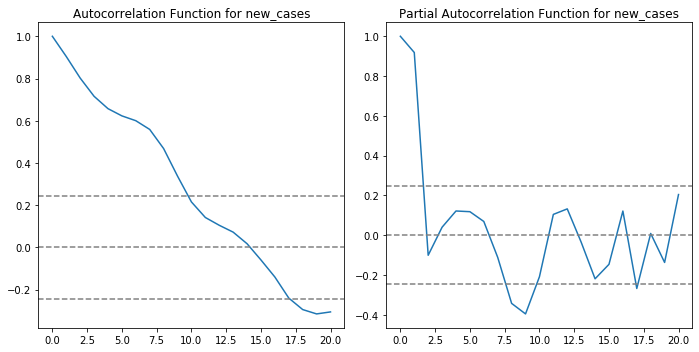

In [19]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

# determine ACF and PACF
lag_acf = acf(np.array(df['new_cases']), nlags = 20)
lag_pacf = pacf(np.array(df['new_cases']), nlags = 20)

# plot ACF and PACF
plot_acf_pacf(df = df, ts = 'new_cases')

In [20]:
def run_arima_model(df, ts, p, d, q):
    """
    Run ARIMA model
    """
    from statsmodels.tsa.arima_model import ARIMA

    # fit ARIMA model on time series
    model = ARIMA(df[ts], order=(p, d, q))  
    results_ = model.fit(disp=-1)  

    # get lengths correct to calculate RSS
    len_results = len(results_.fittedvalues)
    ts_modified = df[ts][-len_results:]

    # calculate root mean square error (RMSE) and residual sum of squares (RSS)
    rss = sum((results_.fittedvalues - ts_modified)**2)
    rmse = np.sqrt(rss / len(df[ts]))

    # plot fit
    plt.plot(df[ts])
    plt.plot(results_.fittedvalues, color = 'red')
    plt.title('For ARIMA model (%i, %i, %i) for ts %s, RSS: %.4f, RMSE: %.4f' %(p, d, q, ts, rss, rmse))

    plt.show()
    plt.close()

    return results_

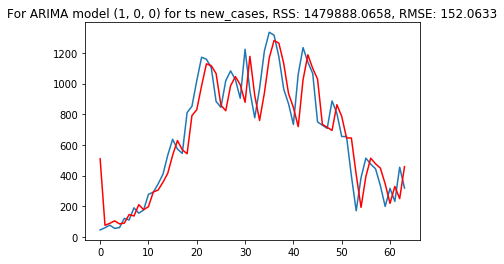

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


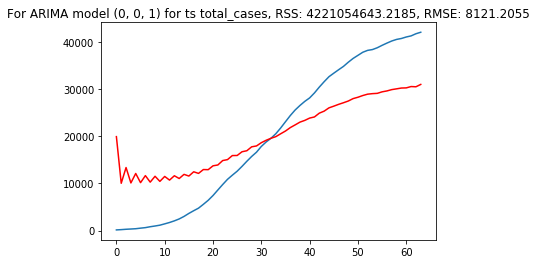

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [79]:
# Note: I do the differencing in the transformation of the data 'ts_log_diff'
# AR model with 1st order differencing - ARIMA (1,0,0)
model_AR = run_arima_model(df = df, 
                           ts = 'new_cases', 
                           p = 1, 
                           d = 0, 
                           q = 0)

# MA model with 1st order differencing - ARIMA (0,0,1)
model_MA = run_arima_model(df = df, 
                           ts = 'total_cases', 
                           p = 0, 
                           d = 0, 
                           q = 1)

# ARMA model with 1st order differencing - ARIMA (1,0,1)
model_MA = run_arima_model(df = df, 
                           ts = 'total_cases', 
                           p = 1, 
                           d = 0, 
                           q = 1)

# Let us model some time-series data! Finally! Facebook Prophet package.

We will be doing an example here! Installing the necessary packages might take a couple of minutes.  In the meantime, I can talk a bit about [Facebook Prophet](https://facebook.github.io/prophet/), a tool that allows folks to forecast using additive or component models relatively easily.  It can also include things like:
* Day of week effects
* Day of year effects
* Holiday effects
* Trend trajectory
* Can do MCMC sampling

In [22]:
!pip install pystan
!pip install fbprophet
from fbprophet import Prophet
import datetime
from datetime import datetime

     |████████████████████████████████| 39.1MB 1.2MB/s eta 0:00:01
     |████████████████████████████████| 61kB 3.2MB/s eta 0:00:011
     |████████████████████████████████| 51kB 4.4MB/s eta 0:00:011
     |████████████████████████████████| 112kB 2.0MB/s eta 0:00:01
     |████████████████████████████████| 1.5MB 4.4MB/s eta 0:00:01
     |████████████████████████████████| 737kB 5.1MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Applications/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/fp/2d2vgv6n00l67fh92dmqvr_h0000gn/T/pip-install-r7puzlj8/fbprophet/setup.py'"'"'; __file__='"'"'/private/var/folders/fp/2d2vgv6n00l67fh92dmqvr_h0000gn/T/pip-install-r7puzlj8/fbprophet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/fp/2d2vgv6n00l67fh92dmqvr_h0000

Importing plotly failed. Interactive plots will not work.


In [23]:
def days_between(d1, d2):
    """Calculate the number of days between two dates.  D1 is start date (inclusive) and d2 is end date (inclusive)"""
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days + 1)

In [ ]:
# Inputs for query

date_column = 'dt'
metric_column = 'ts'
table = df_example
start_training_date = '2010-07-03'
end_training_date = '2018-09-08'
start_forecasting_date = '2018-09-09'
end_forecasting_date = '2018-12-31'
year_to_estimate = '2018'

# Inputs for forecasting

# future_num_points
# If doing different time intervals, change future_num_points
future_num_points = days_between(start_forecasting_date, end_forecasting_date)

cap = None # 2e6

# growth: default = 'linear'
# Can also choose 'logistic'
growth = 'linear'

# n_changepoints: default = 25, uniformly placed in first 80% of time series
n_changepoints = 25 

# changepoint_prior_scale: default = 0.05
# Increasing it will make the trend more flexible
changepoint_prior_scale = 0.05 

# changpoints: example = ['2016-01-01']
changepoints = None 

# holidays_prior_scale: default = 10
# If you find that the holidays are overfitting, you can adjust their prior scale to smooth them
holidays_prior_scale = 10 

# interval_width: default = 0.8
interval_width = 0.8 

# mcmc_samples: default = 0
# By default Prophet will only return uncertainty in the trend and observation noise.
# To get uncertainty in seasonality, you must do full Bayesian sampling. 
# Replaces typical MAP estimation with MCMC sampling, and takes MUCH LONGER - e.g., 10 minutes instead of 10 seconds.
# If you do full sampling, then you will see the uncertainty in seasonal components when you plot:
mcmc_samples = 0

# holiday: default = None
# thanksgiving = pd.DataFrame({
#   'holiday': 'thanksgiving',
#   'ds': pd.to_datetime(['2014-11-27', '2015-11-26',
#                         '2016-11-24', '2017-11-23']),
#   'lower_window': 0,
#   'upper_window': 4,
# })
# christmas = pd.DataFrame({
#   'holiday': 'christmas',
#   'ds': pd.to_datetime(['2014-12-25', '2015-12-25', 
#                         '2016-12-25','2017-12-25']),
#   'lower_window': -1,
#   'upper_window': 0,
# })
# holidays = pd.concat((thanksgiving,christmas))
holidays = None

daily_seasonality = True

In [ ]:
# get relevant data - note: could also try this with ts_log_diff
df_prophet = df_example_transform[['ts']] # can try with ts_log_diff

# reset index
df_prophet = df_prophet.reset_index()

# rename columns
df_prophet = df_prophet.rename(columns = {'ds': 'ds', 'ts': 'y'}) # can try with ts_log_diff

# Change 'ds' type from datetime to date (necessary for FB Prophet)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Change 'y' type to numeric (necessary for FB Prophet)
df_prophet['y'] = pd.to_numeric(df_prophet['y'], errors='ignore')

# Remove any outliers
# df.loc[(df_['ds'] > '2016-12-13') & (df_['ds'] < '2016-12-19'), 'y'] = None

In [ ]:
def create_daily_forecast(df,
#                           cap,
                          holidays,
                          growth,
                          n_changepoints = 25,
                          changepoint_prior_scale = 0.05,
                          changepoints = None,
                          holidays_prior_scale = 10,
                          interval_width = 0.8,
                          mcmc_samples = 1,
                          future_num_points = 10, 
                          daily_seasonality = True):
    """
    Create forecast
    """

    # Create copy of dataframe
    df_ = df.copy()

    # Add in growth parameter, which can change over time
    #     df_['cap'] = max(df_['y']) if cap is None else cap

    # Create model object and fit to dataframe
    m = Prophet(growth = growth,
              n_changepoints = n_changepoints,
              changepoint_prior_scale = changepoint_prior_scale,
              changepoints = changepoints,
              holidays = holidays,
              holidays_prior_scale = holidays_prior_scale,
              interval_width = interval_width,
              mcmc_samples = mcmc_samples, 
              daily_seasonality = daily_seasonality)

    # Fit model with dataframe
    m.fit(df_)

    # Create dataframe for predictions
    future = m.make_future_dataframe(periods = future_num_points)
    #     future['cap'] = max(df_['y']) if cap is None else cap

    # Create predictions
    fcst = m.predict(future)

    # Plot
    m.plot(fcst);
    m.plot_components(fcst)

    return fcst

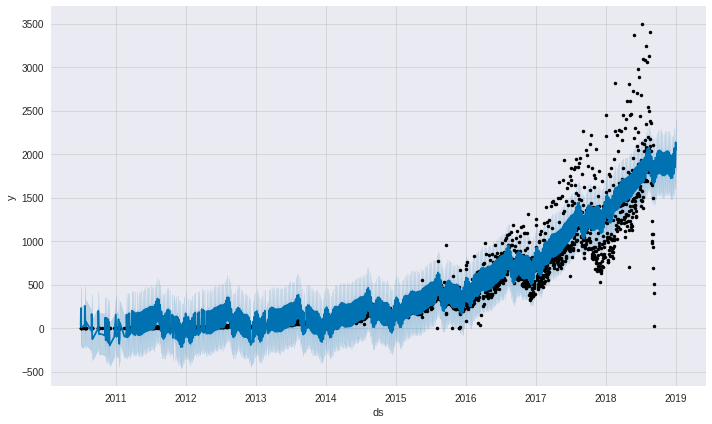

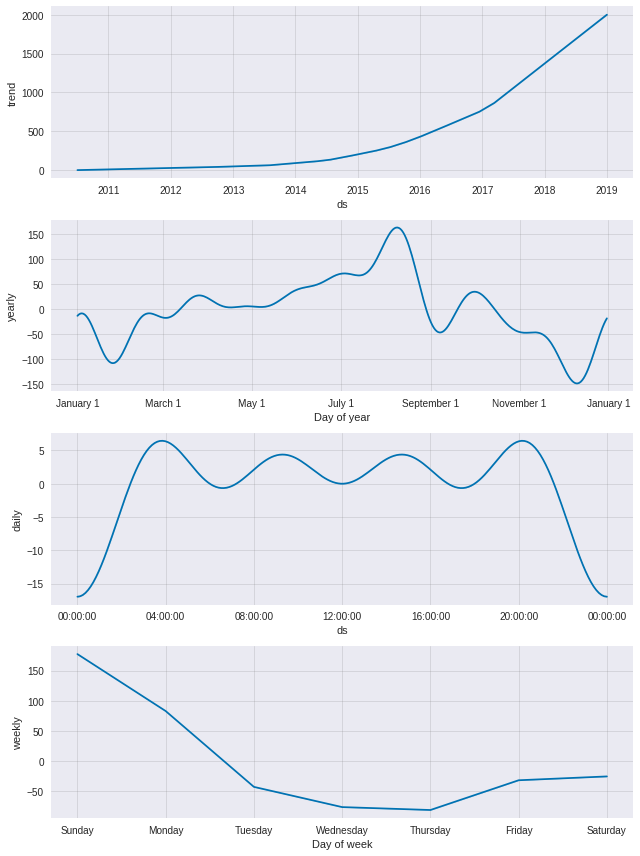

In [ ]:
fcst = create_daily_forecast(df_prophet,
#                              cap,
                             holidays,
                             growth,
                             n_changepoints,
                             changepoint_prior_scale,
                             changepoints, 
                             holidays_prior_scale,
                             interval_width,
                             mcmc_samples,
                             future_num_points, 
                             daily_seasonality)

In [ ]:
def calculate_mape(y_true, y_pred):
    """ Calculate mean absolute percentage error (MAPE)"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_mpe(y_true, y_pred):
    """ Calculate mean percentage error (MPE)"""
    return np.mean((y_true - y_pred) / y_true) * 100

def calculate_mae(y_true, y_pred):
    """ Calculate mean absolute error (MAE)"""
    return np.mean(np.abs(y_true - y_pred)) * 100

def calculate_rmse(y_true, y_pred):
    """ Calculate root mean square error (RMSE)"""
    return np.sqrt(np.mean((y_true - y_pred)**2))

def print_error_metrics(y_true, y_pred):
    print('MAPE: %f'%calculate_mape(y_true, y_pred))
    print('MPE: %f'%calculate_mpe(y_true, y_pred))
    print('MAE: %f'%calculate_mae(y_true, y_pred))
    print('RMSE: %f'%calculate_rmse(y_true, y_pred))
    return

In [ ]:
print_error_metrics(y_true = df_prophet['y'], y_pred = fcst['yhat'])

MAPE: 489.853947
MPE: 61.942978
MAE: 11526.827186
RMSE: 189.137808


# Let us model some time-series data! Finally! LSTM for regression

We will be going through an example here.

Also, here are some resources on recurrent neural networks (RNN) and Long Short-Term Memory networks (LSTMs):
* [Link 1](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)
* [Link 2](https://blog.statsbot.co/time-series-prediction-using-recurrent-neural-networks-lstms-807fa6ca7f)
* [Link 3](http://adventuresinmachinelearning.com/recurrent-neural-networks-lstm-tutorial-tensorflow/)

In [31]:
def do_lstm_model(df, 
                  ts, 
                  look_back, 
                  epochs, 
                  type_ = None, 
                  train_fraction = 0.67):
    """
    Create LSTM model
    Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
    """
    # Import packages
    import numpy
    import matplotlib.pyplot as plt
    from pandas import read_csv
    import math
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import LSTM
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import mean_squared_error

  # Convert an array of values into a dataset matrix
    def create_dataset(dataset, look_back=1):
        """
        Create the dataset
        """
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return numpy.array(dataX), numpy.array(dataY)

    # Fix random seed for reproducibility
    numpy.random.seed(7)

    # Get dataset
    dataset = df[ts].values
    dataset = dataset.astype('float32')

    # Normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset.reshape(-1, 1))

    # Split into train and test sets
    train_size = int(len(dataset) * train_fraction)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

    # Reshape into X=t and Y=t+1
    look_back = look_back
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    # Reshape input to be [samples, time steps, features]
    if type_ == 'regression with time steps':
        trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
        testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
    elif type_ == 'stacked with memory between batches':
        trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
        testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
    else:
        trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

    # Create and fit the LSTM network
    batch_size = 1
    model = Sequential()

    if type_ == 'regression with time steps':
        model.add(LSTM(4, input_shape=(look_back, 1)))
    elif type_ == 'memory between batches':
        model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
    elif type_ == 'stacked with memory between batches':
        model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
        model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
    else:
        model.add(LSTM(4, input_shape=(1, look_back)))

        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')

    if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
        for i in range(100):
            model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
            model.reset_states()
        else:
            model.fit(trainX, 
                      trainY, 
                      epochs = epochs, 
                      batch_size = 1, 
                      verbose = 2)

    # Make predictions
    if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
        trainPredict = model.predict(trainX, batch_size=batch_size)
        testPredict = model.predict(testX, batch_size=batch_size)
    else:
        trainPredict = model.predict(trainX)
        testPredict = model.predict(testX)

    # Invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # Calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))

    # Shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    # Shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

    # Plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()
    plt.close()

    return

Train Score: 704.37 RMSE
Test Score: 531.78 RMSE


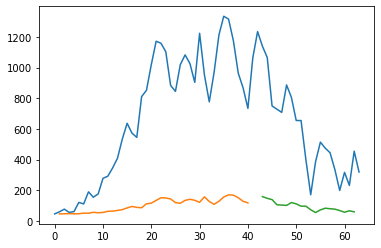

Train Score: 868.43 RMSE
Test Score: 579.57 RMSE


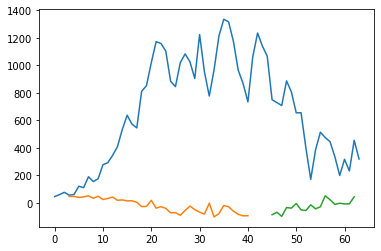

Train Score: 857.32 RMSE
Test Score: 552.96 RMSE


ValueError: could not broadcast input array from shape (38,4) into shape (38,1)

In [32]:
# LSTM Network for Regression
do_lstm_model(df = df, 
              ts = 'new_cases', 
              look_back = 1, 
              epochs = 5)

# LSTM for Regression Using the Window Method
do_lstm_model(df = df, 
              ts = 'new_cases', 
              look_back = 3, 
              epochs = 5)

# LSTM for Regression with Time Steps
do_lstm_model(df = df, 
              ts = 'new_cases', 
              look_back = 3, 
              epochs = 5, 
              type_ = 'regression with time steps')

# # LSTM with Memory Between Batches
# do_lstm_model(df = df_prophet, 
#               ts = 'y', 
#               look_back = 3, 
#               epochs = 5, 
#               type_ = 'memory between batches')

# # Stacked LSTMs with Memory Between Batches
# do_lstm_model(df = df_prophet, 
#               ts = 'y', 
#               look_back = 3, 
#               epochs = 5, 
#               type_ = 'stacked with memory between batches')

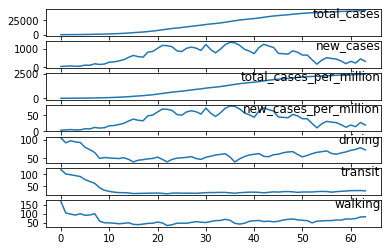

In [40]:
from matplotlib import pyplot
# load dataset
dataset = df
values = dataset.values
# specify columns to plot
groups = [1, 2, 5, 6,-4,-3,-2,]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential  #Sequential 用于初始化神经网络
from keras.layers import Dense       #Dense 用于添加全连接的神经网络层
from keras.layers import LSTM        #LSTM 用于添加长短期内存层
from keras.layers import Dropout     #Dropout 用于添加防止过拟合的dropout层
#构建训练数据
def train_data():
    dataset_train = df
    training_set = dataset_train.iloc[:,1:12].values
    print(dataset_train.tail())
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(training_set)
    n=len(training_set_scaled)
    #print(training_set_scaled)
    X_train = []
    y_train = []
    for i in range(n)
        X_train.append(training_set_scaled[i, :])
        y_train.append(training_set_scaled[i, 2])
    X_train, y_train = np.array(X_train), np.array(y_train)      
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 12))
    
    return X_train,y_train,dataset_train,sc
#构建测试数据

train_data()

          date  total_cases  new_cases  total_deaths  new_deaths  \
59  2020-05-05        40770        199          5082          26   
60  2020-05-06        41087        317          5168          86   
61  2020-05-07        41319        232          5204          36   
62  2020-05-08        41774        455          5288          84   
63  2020-05-09        42093        319          5359          71   

    total_cases_per_million  new_cases_per_million  total_deaths_per_million  \
59                 2379.358                 11.614                   296.588   
60                 2397.858                 18.500                   301.607   
61                 2411.398                 13.540                   303.708   
62                 2437.952                 26.554                   308.610   
63                 2456.569                 18.617                   312.754   

    new_deaths_per_million  driving  transit  walking  days  
59                   1.517    66.65    29.16    

In [ ]:
def test_data(dataset_train,sc):
    dataset_test = pd.read_csv('tatatest.csv')
    real_stock_price = dataset_test.iloc[:, 1:2].values
    #合并训练集和测试集
    dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
    db_all = dataset_total.iloc[:, 1:7].values
    inputs = db_all[len(dataset_total) - len(dataset_test) - 60:]
    inputs = inputs.reshape(-1,6)
    inputs = sc.transform(inputs)
    X_test = []
    for i in range(60, 76):
        X_test.append(inputs[i-60:i, :])
        #X_test.append(inputs[i-60:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 6))
    
    return X_test,real_stock_price
#创建股票预测模型
def stock_model(X_train, y_train):
    regressor = Sequential()
    #LSTM的输入为 [samples, timesteps, features],这里的timesteps为步数，features为维度 这里我们的数据是6维的
    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 6)))
    
    regressor.add(Dropout(0.2))
    
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    #全连接，输出6个
    regressor.add(Dense(units = 6))
    
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
    
    return regressor
def main():
    X_train, y_train,dataset_train,sc = train_data()
    
    regressor = stock_model(X_train, y_train)
    X_test,real_stock_price = test_data(dataset_train,sc)
    predicted_stock_price = regressor.predict(X_test)
    
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    
    plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
    #显示开盘价
    plt.plot(predicted_stock_price[:,0], color = 'green', label = 'Predicted TATA Stock Price')
    plt.title('TATA Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('TATA Stock Price')
    plt.legend()
    plt.show()
if __name__ == '__main__':
    main()